In [39]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random
style.use('fivethirtyeight')

In [90]:
#xs = np.array([1,2,3,4,5,6], dtype=np.float64)
#ys = np.array([5,4,6,5,4,7], dtype=np.float64)

def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [x for x in range(len(ys))]
    return np.array(xs, dtype= np.float64), np.array(ys, dtype= np.float64)

xs, ys = create_dataset(40, 40, 2, correlation='pos') 

In [91]:
def best_fit_slope_and_intercept(xs, ys):
    m = ( (mean(xs) * mean(ys)) - mean(xs * ys) ) / ( (mean(xs))**2 - mean(xs**2) )
    b = mean(ys) - m * mean(xs)
    return m, b
m, b = best_fit_slope_and_intercept(xs, ys)
print (m, b)

2.082270168855535 -0.9292682926829414


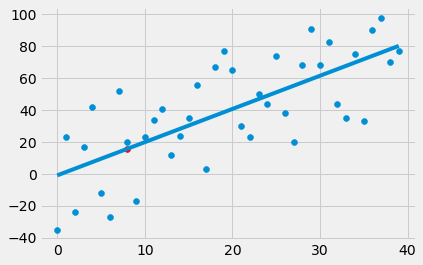

In [92]:
plt.scatter(xs, ys)
regression_line = [(x*m+b) for x in xs]
plt.plot(xs, regression_line)
predict_x = 8 
predict_y = m*predict_x + b
plt.scatter(predict_x, predict_y, c='r')

In [93]:
def squared_error(ys_orig, ys_line):
    return (sum(ys_line - ys_orig)**2)

In [94]:
def coefficeint_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys) for y in ys_orig]
    squared_error_reg = squared_error(ys_orig, ys_line)
    squared_error_y_mean_line = squared_error(ys_orig, y_mean_line)
    ans = 1 - (squared_error_reg/squared_error_y_mean_line)
    return ans

In [95]:
r_squared = coefficeint_of_determination(ys, regression_line)

In [96]:
print(r_squared)

0.7065972222222222
